In [171]:
import jupyter_black

jupyter_black.load()

# Unsupervised Learning
This notebook explores the Unsupervised learning algorithms.
You should fill out the <span style="color:purple">**3 dots ...**</span> with the corresponding lines of codes. <br>

In [172]:
import matplotlib.pyplot as plt

plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

# Clustering

**Introduction – Classification _vs_ Clustering**

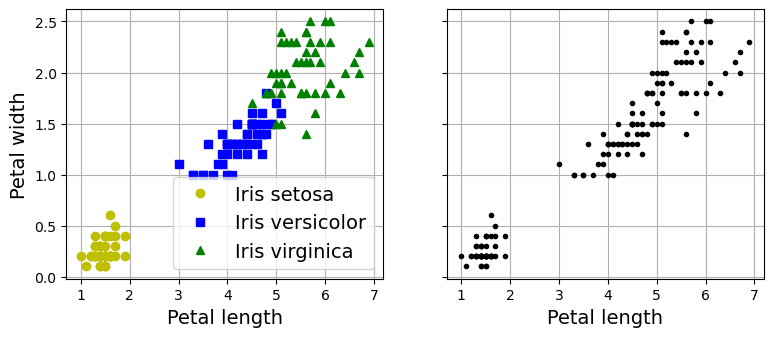

In [173]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y == 0, 2], X[y == 0, 3], "yo", label="Iris setosa")
plt.plot(X[y == 1, 2], X[y == 1, 3], "bs", label="Iris versicolor")
plt.plot(X[y == 2, 2], X[y == 2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()

plt.show()

**Note**: the next cell shows how a Gaussian mixture model (explained later in this chapter) can actually separate these clusters pretty well using all 4 features: petal length & width, and sepal length & width. This code maps each cluster to a class. Instead of hard coding the mapping, the code picks the most common class for each cluster using the `scipy.stats.mode()` function:

In [174]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

the true label : 0  is represented by GMM as the label:  1
the true label : 1  is represented by GMM as the label:  2
the true label : 2  is represented by GMM as the label:  0


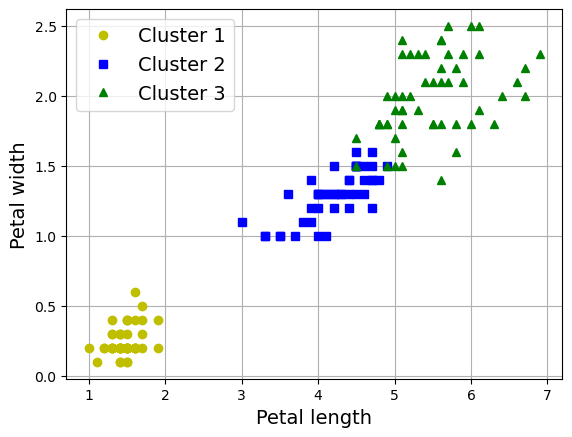

In [175]:
import numpy as np
from scipy import stats
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
# since GMM has identified the labels, we will need to map them to the True labels we already know.
# In other terms, what are labeled cluster 0 (iris versicolor) in GMM might be the cluster 1 (iris versicolor) in our dataset.
mapping = {}
for class_id in np.unique(y):
    # we will look inside at the instances for which their true labels is class_id (y_pred[y==class_id]); class_id is {0, 1, 2}; then we will chec what GMM predicted here
    # and get the label that got the highest number of votes (stats.mode)
    mode, _ = stats.mode(y_pred[y == class_id])
    print("the true label :", class_id, " is represented by GMM as the label: ", mode)
    mapping[mode] = class_id
# here we are using the mapping dictionary to transform y_pred to the labels in our dataset
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

plt.plot(X[y_pred == 0, 2], X[y_pred == 0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred == 1, 2], X[y_pred == 1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred == 2, 2], X[y_pred == 2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.grid()
plt.show()

What's the ratio of iris plants we assigned to the right cluster?

In [176]:
(y_pred == y).sum() / len(y_pred)

0.9666666666666667

## K-Means

In [177]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]]
)
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(
    n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7
)

# Initialize a kmeans model with 5 clusters and a random state, fit the model on the train data (X)
# and predict the clusters
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X, y)

/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Now let's plot them:

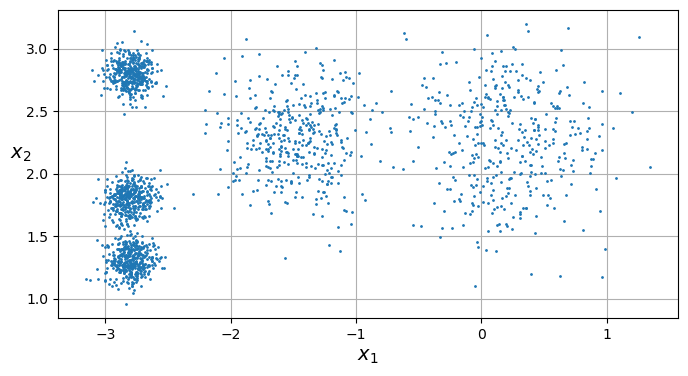

In [178]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)


plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

In kmeans, the clusters of each of the train data point X are contained inside the `labels_` attribute. <br>
Since, here we have predicted back on the train data, the `y_pred` is equal to the `kmeans.labels_` . <br>
**NB:** Not to be confused with classes, the _label_ of an instance is the index of the cluster that instance gets assigned to (they are not targets, they are predictions).

In [179]:
kmeans.labels_

array([0, 0, 4, ..., 3, 1, 0], dtype=int32)

In [180]:
y_pred

array([0, 0, 4, ..., 3, 1, 0], dtype=int32)

In [181]:
y_pred is kmeans.labels_

True

And the following 5 _centroids_ (i.e., cluster centers) were estimated:

In [182]:
# Print the centroids coordinations (values of X1 and X2 of the centroids); NB: centroids = the cluster centers
kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

In [183]:
import numpy as np

# Predict the labels of the new instances
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([4, 4, 3, 3], dtype=int32)

## Decision Boundaries

Let's plot the model's decision boundaries. This gives us a _Voronoi diagram_:

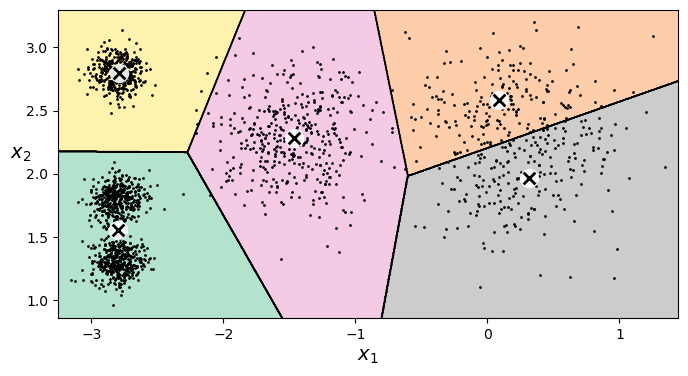

In [184]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], "k.", markersize=2)


def plot_centroids(centroids, weights=None, circle_color="w", cross_color="k"):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="o",
        s=35,
        linewidths=8,
        color=circle_color,
        zorder=10,
        alpha=0.9,
    )
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=2,
        linewidths=12,
        color=cross_color,
        zorder=11,
        alpha=1,
    )


def plot_decision_boundaries(
    clusterer,
    X,
    resolution=1000,
    show_centroids=True,
    show_xlabels=True,
    show_ylabels=True,
):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(
        np.linspace(mins[0], maxs[0], resolution),
        np.linspace(mins[1], maxs[1], resolution),
    )
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(
        Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors="k"
    )
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)


plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

The clusters are well identified. <br>
However, some of the instances near the edges were probably assigned to the wrong cluster.

## Hard Clustering _vs_ Soft Clustering

Rather than choosing the closest cluster for each instance, which is called _hard clustering_, it might be better to measure the distance of each instance to all 5 centroids.

This is possible thanks to the `transform()` method.

In [185]:
# Compute the distance of the each instance in X_new to every cluster using the transform method
distance_to_every_cluster = kmeans.transform(X_new)
print(
    "The distance of the 1st instance to the 1st clsuter is:",
    distance_to_every_cluster.round(2)[0, 0],
)
print(
    "The distance of the 1st instance to the 2nd clsuter is:",
    distance_to_every_cluster.round(2)[0, 1],
)
print(
    "The distance of the 1st instance to the 3rd clsuter is:",
    distance_to_every_cluster.round(2)[0, 2],
)
print(
    "The distance of the 1st instance to the 4th clsuter is:",
    distance_to_every_cluster.round(2)[0, 3],
)
print(
    "The distance of the 1st instance to the 5th clsuter is:",
    distance_to_every_cluster.round(2)[0, 4],
)

The distance of the 1st instance to the 1st clsuter is: 2.84
The distance of the 1st instance to the 2nd clsuter is: 0.59
The distance of the 1st instance to the 3rd clsuter is: 1.5
The distance of the 1st instance to the 4th clsuter is: 2.9
The distance of the 1st instance to the 5th clsuter is: 0.31


## K-Means Variability
In the original K-Means algorithm, the centroids are initialized randomly, and the algorithm simply runs a single iteration to gradually improve the centroids.

However, one major problem with this approach is that if you run K-Means multiple times (or with different random seeds), it can converge to very different solutions.

Let us explore this:

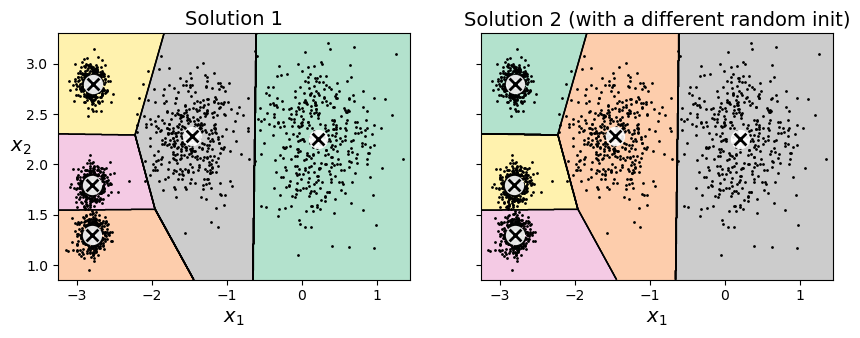

In [186]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2)


# Intialize 2 Kmeans clusterers with k=5, init="random", n_init = 1,
# with only one difference "the random state", the first model gets random_state=12
# and the second gets random_state=3
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, random_state=12)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, random_state=3)

plot_clusterer_comparison(
    kmeans_rnd_init1,
    kmeans_rnd_init2,
    X,
    "Solution 1",
    "Solution 2 (with a different random init)",
)

plt.show()

In [187]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
# Now, initialize a KMeans model with k=5, init=good_init, n_init=1, and a random_state=7
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=7)
# Fit the model to X
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=7)

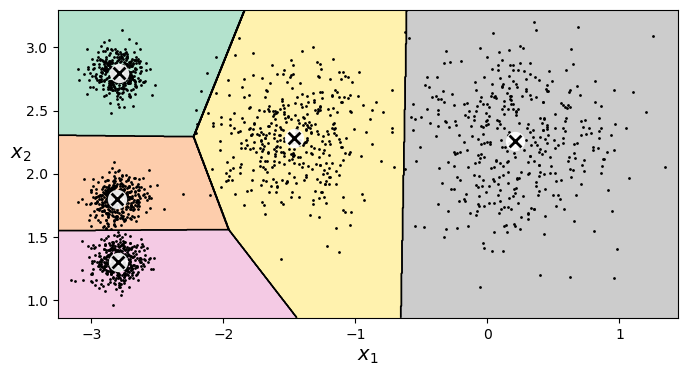

In [188]:
# Let us plot the decision boundary
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

As you can see, we have a model that successfully identified the right 5 clusters.
### Inertia

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the `inertia_` metric.

Inertia is the sum of the squared distances between each training instance and its closest centroid.

In [189]:
# print the inertia of the kmeans, kmeans_rnd_init1, and kmeans_rnd_init2 models
print("Inertia of kmeans is:", kmeans.inertia_)
print("Inertia of kmeans is:", kmeans_rnd_init1.inertia_)
print("Inertia of kmeans is:", kmeans_rnd_init2.inertia_)

Inertia of kmeans is: 211.5985372581684
Inertia of kmeans is: 211.5985372581684
Inertia of kmeans is: 211.59853725816836


The highest value of inertia goes to the worst model!

In [190]:
# Inertia computed manually
# Transform X using kmeans --> we will transform X from the shape (2000,2) to (2000,5)
X_dist = kmeans.transform(X)
# X_dist[0] = the distances between x0 and the 5 centroids
# Inertia computed manually
# X_dist[np.arange(len(X_dist)), kmeans.labels_] is equivalent to extract for each instance xi, the shortest distance,
# i.e., the distance to the assigned cluster's centroid
# (X_dist[np.arange(len(X_dist)), kmeans.labels_] ** 2) = square these distances (distance between
# xi and the centroid of the cluster to which it got assigned)
# (X_dist[np.arange(len(X_dist)), kmeans.labels_] ** 2).sum() = the sum of all square distances
(X_dist[np.arange(len(X_dist)), kmeans.labels_] ** 2).sum()

211.59853725816805

The `score()` method returns the negative inertia. Why negative? Well, it is because a predictor's `score()` method must always respect the "_greater is better_" rule.

In [191]:
# compute the negative inertia of the model "kmeans" using the score method
negative_inertia = kmeans.score(X)
negative_inertia

-211.5985372581684

### Multiple Initializations

So one approach to solve the variability issue is to simply run the K-Means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia.

When you set the `n_init` hyperparameter, Scikit-Learn runs the original algorithm `n_init` times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets `n_init=10`.

In [192]:
# Initialize a KMeans of k=5, init="random", n_init=10, and a random state
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10, random_state=42)
# Fit the model to X
kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=10, random_state=42)

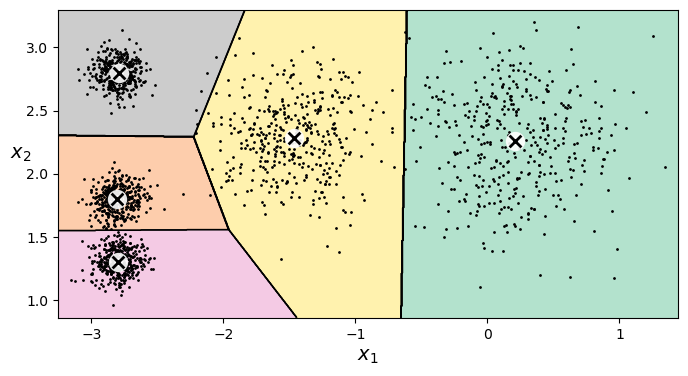

In [193]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

As you can see from the decision boundary above, we end up with the initial model, which is certainly the optimal K-Means solution (at least in terms of inertia, and assuming $k=5$).

In [194]:
# Compute the inertia of the model "kmeans_rnd_10_inits"
kmeans_rnd_10_inits.inertia_

211.5985372581684

The inertia value is similar to the one obtained with the initial model `kmeans`.
### Centroid initialization methods

Let use kmeans++ and reduce `n_init`.

With kmeans++, the centroid initialization is optimized so the model converges faster and to an optimal solution.

To set the initialization to K-Means++, simply set `init="k-means++"` (this is actually the default):

Inertia of kmean++ is: 219.42800073647595


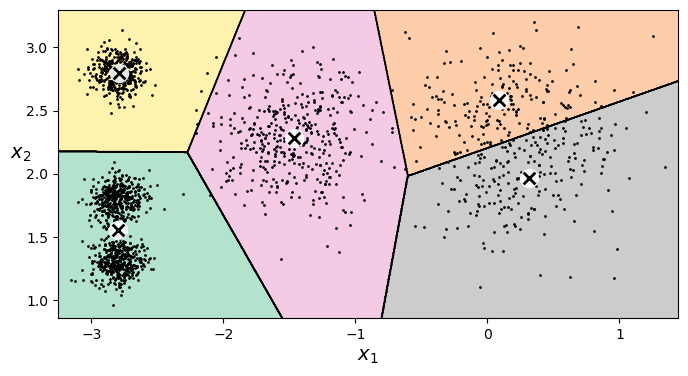

In [195]:
# Initialize a KMeans of k=5, init="k-means++", n_init=10, and a random state
kmeans_plus_plus = KMeans(n_clusters=5, init="k-means++", n_init=10, random_state=42)
# Fit the model to X
kmeans_plus_plus.fit(X)
# print the inertia of the model "kmeans_plus_plus"
print("Inertia of kmean++ is:", kmeans_plus_plus.inertia_)
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_plus_plus, X)
plt.show()

### Accelerated K-Means
The K-Means algorithm can sometimes be accelerated by avoiding many unnecessary distance calculations: this is achieved by exploiting the triangle inequality (given three points A, B and C, the distance AC is always such that AC ≤ AB + BC) and by keeping track of lower and upper bounds for distances between instances and centroids (see this [2003 paper](https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf) by Charles Elkan for more details).

For Elkan's variant of K-Means, use `algorithm="elkan"`. For regular KMeans, use `algorithm="full"`. The default is `"auto"`, which uses the full algorithm since Scikit-Learn 1.1 (it used Elkan's algorithm before that).

Inertia of the Accelerated kmean is: 211.5985372581684


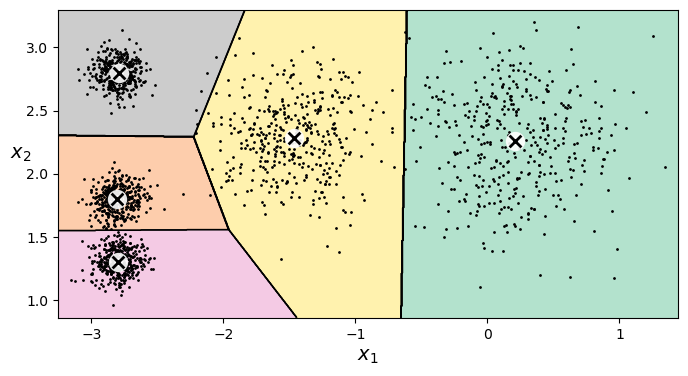

In [196]:
# Initialize a KMeans of k=5, algorithm='elkan', init="random", n_init=10, and a random state
kmeans_elkan = KMeans(
    n_clusters=5, algorithm="elkan", init="random", n_init=10, random_state=42
)
# Fit the model to X
kmeans_elkan.fit(X)
# print the inertia of the model "kmeans_elkan"
print("Inertia of the Accelerated kmean is:", kmeans_elkan.inertia_)
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_elkan, X)
plt.show()

### Mini-Batch K-Means
Scikit-Learn also implements a variant of the K-Means algorithm that supports mini-batches (see [this paper](http://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf)):

In [197]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


MiniBatchKMeans(n_clusters=5, random_state=42)

In [198]:
minibatch_kmeans.inertia_

211.65899374574312

### Using `MiniBatchKMeans` along with `memmap`

If the dataset does not fit in memory, the simplest option is to use the memmap class, just like we did for incremental PCA in the previous chapter.

In [199]:
from sklearn.datasets import fetch_openml
from sklearn.cluster import MiniBatchKMeans

mnist = fetch_openml("mnist_784", as_frame=False)

X_train, y_train = mnist.data[:60000], mnist.target[:60000]
X_test, y_test = mnist.data[60000:], mnist.target[60000:]
#  writing the training set to a memmap
filename = "my_mnist.mmap"
X_memmap = np.memmap(filename, dtype="float32", mode="write", shape=X_train.shape)
X_memmap[:] = X_train
X_memmap.flush()

minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_memmap)

/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


MiniBatchKMeans(batch_size=10, n_clusters=10, random_state=42)

## Finding the optimal number of clusters

What if the number of clusters was set to a lower or greater value than 5?

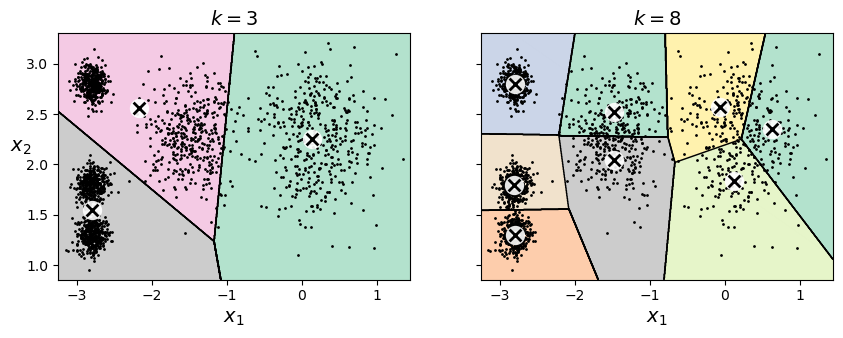

In [200]:
# Initialize 2 kmeans models with the same random_state and n_init=10 but one with k=3 and the other with k=8
kmeans_k3 = KMeans(random_state=42, n_init=10, n_clusters=3)
kmeans_k8 = KMeans(random_state=42, n_init=10, n_clusters=8)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

Let us check their inertia.

In [201]:
print("kmeans_k3 has an inertia of :", kmeans_k3.inertia_)
print("kmeans_k8 has an inertia of :", kmeans_k8.inertia_)

kmeans_k3 has an inertia of : 653.2167190021553
kmeans_k8 has an inertia of : 119.22484592677124



The model with k=3 has an inertia of 653, while the model with $k=8$ has an inertia of 119. Moreover, the model previously trained with $k=5$ has an inertia of 211. <br>
Thus, if we take as a metric the inertia, we will end up choosing $k=8$ in this case. Nevertheless, if we look at the decision boundary plot of kmeans model with $k=8$, we can clearly see that the clustering is of poor quality.

Consequently, we cannot simply take the value of $k$ that minimizes the inertia, since it keeps getting lower as we increase $k$. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of $k$ and analyze the resulting curve:

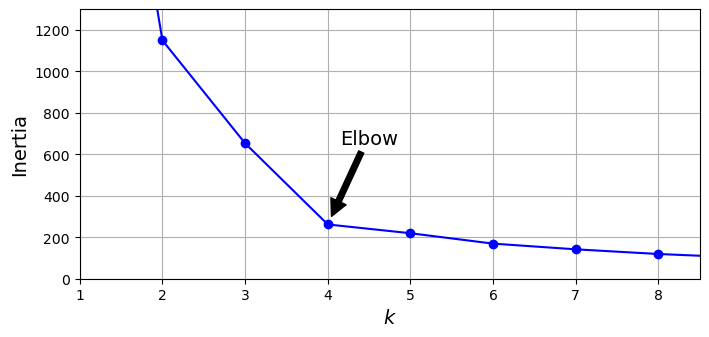

In [202]:
kmeans_per_k = []
inertias = []
for k in range(1, 10):
    # Initialize a Kmeans model of "k" clusters, n_init=10, and a random_state
    kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=42)
    # Fit the model to X
    kmeans_model.fit(X)
    # Compute the kmeans_model inertia
    inertia_model = kmeans_model.inertia_
    kmeans_per_k.append(kmeans_model)
    inertias.append(inertia_model)


plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate(
    "",
    xy=(4, inertias[3]),
    xytext=(4.45, 650),
    arrowprops=dict(facecolor="black", shrink=0.1),
)
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()

As you can see, there is an elbow at $k=4$, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So $k=4$ is a pretty good choice. Of course in this example it is not perfect since it means that the two blobs in the lower left will be considered as just a single cluster, but it's a pretty good clustering nonetheless.

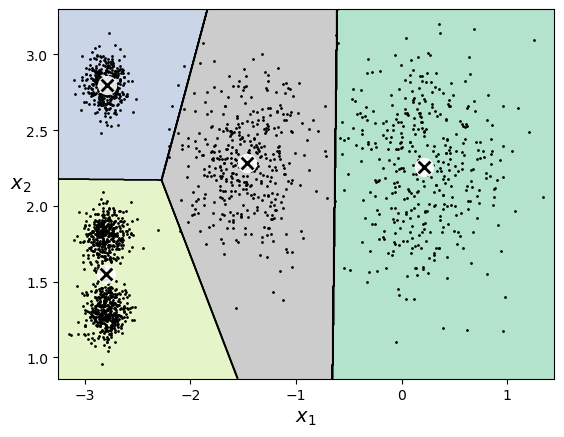

In [203]:
# the index of the model having k=4 is 3 (index of model with k=1 is 0, index of model with k=2 is 1, ...)
plot_decision_boundaries(kmeans_per_k[4 - 1], X)
plt.show()

Another approach is to look at the _silhouette score_, which is the mean _silhouette coefficient_ over all the instances. An instance's silhouette coefficient is equal to (_b_ - _a_) / max(_a_, _b_) where _a_ is the mean distance to the other instances in the same cluster (it is the _mean intra-cluster distance_), and _b_ is the _mean nearest-cluster distance_, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes _b_, excluding the instance's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

Let's plot the silhouette score as a function of $k$:

In [204]:
from sklearn.metrics import silhouette_score

In [206]:
# print the silhouette score of the model "kmeans" that we have trained in the section """K-Means Variability"""
silhouette = silhouette_score(X, kmeans.labels_)
print("silhouette of kmeans with k=5 is:", silhouette)

silhouette of kmeans with k=5 is: 0.6555176425728279


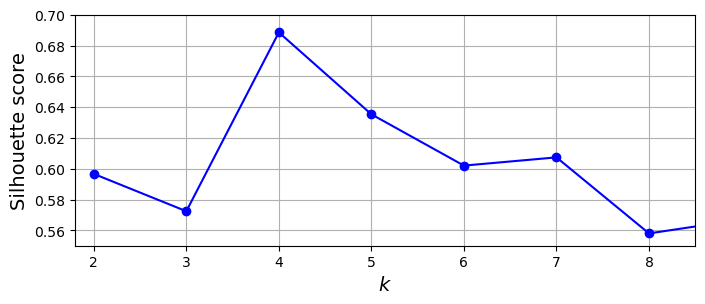

In [208]:
# compute the silhouette scores of every model in the list of models "kmeans_per_k"
# NB, we cannot compute the silhouette score unless we have at least k>=2 clusters
# --> we are looping the list of models  "kmeans_per_k" starting from the second model (the one with k=2)
silhouette_scores = []
for model in kmeans_per_k[1:]:
    # compute the silhouette score
    silhouette_ = silhouette_score(X, model.labels_)
    silhouette_scores.append(silhouette_)


plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
plt.show()

As you can see, this visualization is much richer than the previous one: in particular, although it confirms that $k=4$ is the best choice, but it also underlines the fact that $k=5$ is quite good as well.

An even more informative visualization is the _silhouette diagram_, i.e., when you plot every instance's silhouette coefficient, sorted by the cluster it is assigned to and by the value of the coefficient.

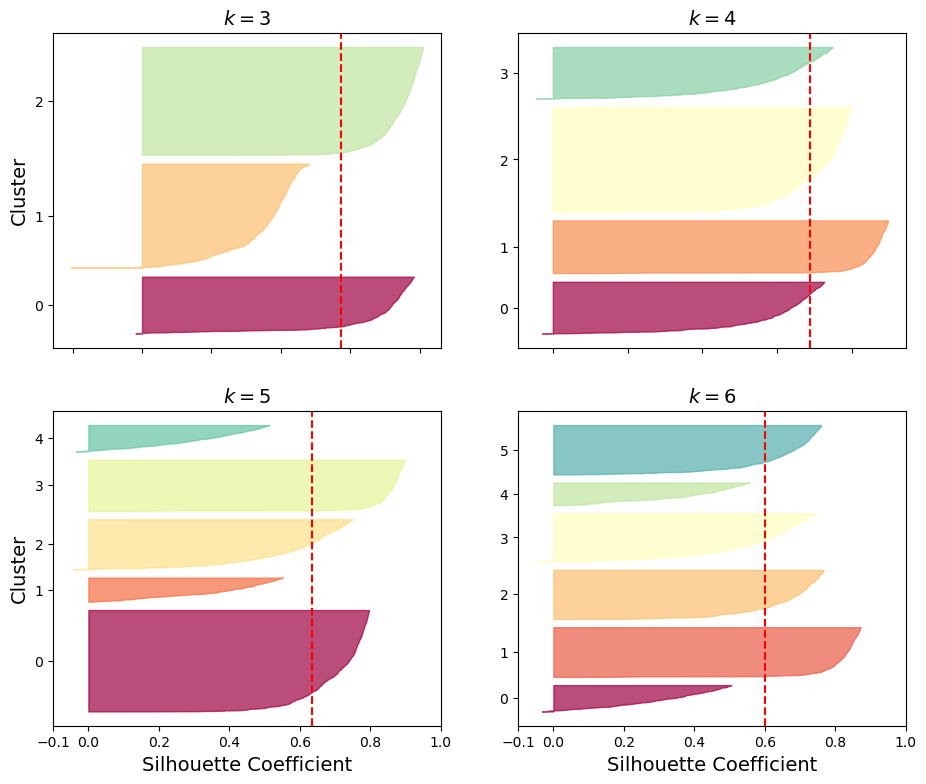

In [209]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))
# Here We are only plotting the silhouette diagram for 4 kmeans models: with k=3, k=4, k=5, and k=6
for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    the_model = kmeans_per_k[k - 1]
    # Extract the clusters' labels of every instance of X from the model "the_model"
    y_pred = the_model.labels_
    # compute the silhouette of every instance of X using the "silhouette_samples" method
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(
            np.arange(pos, pos + len(coeffs)),
            0,
            coeffs,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

with the silhouette diagram, we can conclude that $k=4$ is not really the best choice, because it has clusters of different sizes with one particular cluster that is bigger than all the others (the orange cluster, the third one counting from the top) and the yellow cluster (the second one counting from the top) barely crosses the dashed line corresponding to the mean silhouette score.

On the contrary, the model with $k=5$ looks like the best option here, as all clusters are roughly the same size, and they all cross the dashed line, which represents the mean silhouette score.

## Limits of K-Means
Let's generate a more difficult dataset, with elongated blobs and varying densities, and show that K-Means struggles to cluster it correctly:

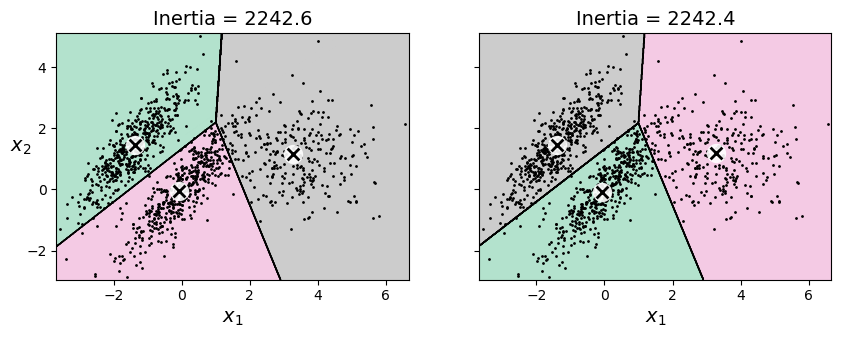

In [210]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

centroids_initialization = np.array([[-1.5, 2.5], [0.5, 0], [4, 0]])
# Initialize a kmeans model of k=3, init=centroids_initialization, n_init=1, and a random_state
kmeans_good = KMeans(
    n_clusters=3, init=centroids_initialization, n_init=1, random_state=42
)
# Fit the model kmeans_good to X
kmeans_good.fit(X)
# Initialize another kmeans model of k=3, n_init=1, and the same random_state as the kmeans_good model (i.e., this time without setting the hyperparameter init)
kmeans_bad = KMeans(n_clusters=3, n_init=1, random_state=42)
# Fit the model kmeans_bad to X
kmeans_bad.fit(X)

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title(f"Inertia = {kmeans_good.inertia_:.1f}")

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title(f"Inertia = {kmeans_bad.inertia_:.1f}")

plt.show()

## Using Clustering for Image Segmentation

Here, we are segmenting the lady bug image per color.

In [137]:
# mount google cloud
from google.colab import drive

drive.mount("/content/drive/")

ModuleNotFoundError: No module named 'google'

In [ ]:
cd drive/MyDrive/Advanced\ Machine\ Learning\ Course

In [138]:
import PIL

filepath = "ladybug.png"
image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

In [139]:
X = image.reshape(-1, 3)
# Initialize a Kmeans model with k=8, n_init=10, and a random_state
kmeans = KMeans(n_clusters=8, n_init=10, random_state=42)
# Fit the model to X; X is now an image
kmeans.fit(X)
# segmented_img = the coordinates of cluster centers of every pixel of the image
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

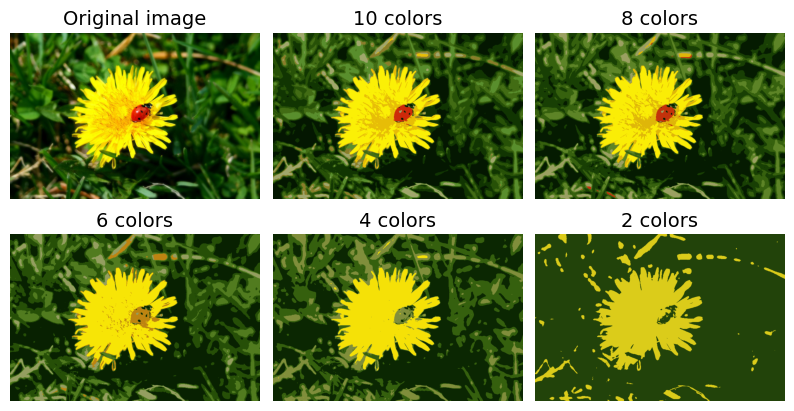

In [140]:
segmented_imgs = []
# let us run several clustering models with each time a different k (for us k here is the number of colors present in the image)
# because we are doing a color segmentation
n_colors = (10, 8, 6, 4, 2)
for k in n_colors:
    kmeans = KMeans(n_clusters=k, n_init=2, random_state=42)
    kmeans.fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis("off")

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis("off")

plt.show()

as you can see from the figure above, when we lower k (i.e., the number of colors), the color red fails to get a cluster of its own and gets merged with colors from the environment. This is because kmeans prefers clusters of similar sizes. The ladybug is small, much smaller than the rest of the image. However, even though its color is flashy, kmeans fails to dedicate a cluster to it.
## Using Clustering for Semi-Supervised Learning

Another use case for clustering is semi-supervised learning, when we have plenty of unlabeled instances and very few labeled instances.

For this, we will use the _digits dataset_, which is a simple MNIST-like dataset containing 1,797 grayscale 8×8 images representing digits 0 to 9.

Here, we will suppose that out of these 1 797 images, only few are labeled. We are only doing that for the sake of the exercise, which is to show how we can use clustering to boost classification performance when we have lots of data with only a small part of it labeled.

Rememeber: with only a few data points labeled, we do not end up with a good ML model that generalizes. Here, the goal is to see how clustering the remaining unlabeled data can help us boost our model's generalization's capability.

In [211]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

Let's look at the performance of a logistic regression model when we only have 50 labeled instances:

In [212]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
# Initialize a logistic regression, set the hyperparam max_iter to 10 000
log_reg = LogisticRegression(max_iter=10_000)
# fit the model to labeled_x_train, label_y_train
labeled_x_train = X_train[:n_labeled]
label_y_train = y_train[:n_labeled]
log_reg.fit(labeled_x_train, label_y_train)

LogisticRegression(max_iter=10000)

In [213]:
# Compute the accuracy score of the model on the test set X_test, y_test

test_accuracy_score = log_reg.score(X_test, y_test)
print(
    "Test Accuracy of the logistic regression model trained on 50 labeled data points is:",
    test_accuracy_score,
)

Test Accuracy of the logistic regression model trained on 50 labeled data points is: 0.7481108312342569


In [214]:
# Le us now measure the accuracy when we use the whole training set
# Initialize a logistic regression, set the hyperparam max_iter to 10 000
log_reg_full = LogisticRegression(max_iter=10000)
# fit the model to the full train data
log_reg.fit(X_train, y_train)
# Compute the accuracy score of the model on the test set X_test, y_test
test_accuracy_score = log_reg.score(X_test, y_test)
print(
    "Test Accuracy of the logistic regression model trained on all the labeled data points is:",
    test_accuracy_score,
)

Test Accuracy of the logistic regression model trained on all the labeled data points is: 0.906801007556675


As you can see, the test accuracy when we train the model on all labeled dataset, we get 90.6% versus 74.8% when trained on 50 data points.

Now, let's see how we can do better.

- First, we will cluster the training set into 50 clusters
- Next, for each cluster, we will find the image closest to the centroid. We will call these images the representative images:

In [215]:
k = 50
# Initialize a Kmeans model with k=50, n_init=10, and a random_state=42
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
# Fit the model to X_train
kmeans.fit(X_train)
# Reduce the dimensionality of X_train using kmeans
X_digits_dist = kmeans.transform(X_train)
# the shape of X_digits_dist is (n, k), with n = 1400 = total nbr of training samples of the full dataset, k = 50 = nbr of clusters
# For every cluster k, I choose the index of the image (data point) that has the lowest distance to the centroid of this cluster
# This sample is the most representative of the cluster
# I end up with 50 samples (since I have k=50 clusters)
representative_digit_idx = X_digits_dist.argmin(axis=0)
# shape of X_representative_digit_idx = 50
print("The indices of the most representative images are:", representative_digit_idx)
# Here we are extracting these representative images from the train set
X_representative_digits = X_train[representative_digit_idx]
# shape of X_representative_digits = (50, 64); 50=nbr of representative images, 64=dimension of each image (8x8)

The indices of the most representative images are: [ 816  410 1188  468  533  692  259  877 1178 1309  175  708 1387  932
  310  991 1312 1250 1005 1114  885 1222  411  543  579  141  252 1156
 1291  870 1168 1050 1383  959  159  881  587  251  438  520 1198  685
  983 1295    2  196 1352  908 1159  943]


Now let's plot these representative images and label them manually:

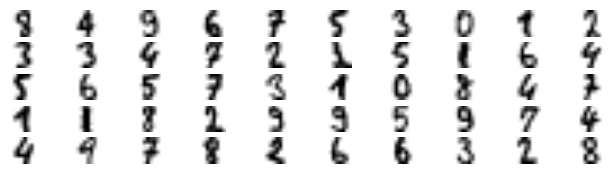

In [216]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(
        X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear"
    )
    plt.axis("off")

plt.show()

In [230]:
# fmt: off
# Manual labeling
y_representative_digits = np.array([
    8, 4, 9, 6, 7, 5, 3, 0, 1, 2,
    3, 3, 4, 7, 2, 1, 5, 1, 6, 4,
    5, 6, 5, 7, 3, 1, 0, 8, 4, 7,
    1, 1, 8, 2, 9, 9, 5, 9, 7, 4,
    4, 9, 7, 8, 2, 6, 6, 3, 2, 8
])
# fmt: on

Now we have a dataset with just 50 labeled instances, but instead of being completely random instances, each of them is a representative image of its cluster. Let's see if the performance is any better:

In [231]:
# Initialize a logistic regression, set the hyperparam max_iter to 10 000
log_reg = LogisticRegression(max_iter=10_000)
# fit the model to X_representative_digits, y_representative_digits
log_reg.fit(X_representative_digits, y_representative_digits)
# Compute the accuracy score of the model on the test set X_test, y_test
test_accuracy_score = log_reg.score(X_test, y_test)
print(
    "Test Accuracy of the logistic regression model trained on the 50 most representative manually labeled data points is:",
    test_accuracy_score,
)

Test Accuracy of the logistic regression model trained on the 50 most representative manually labeled data points is: 0.8413098236775819


We jumped from 74.8% accuracy to 84.9%, although we are still only training the model on 50 instances.

Since it's often costly and painful to label instances, especially when it has to be done manually by experts, it's a good idea to make them label **representative** instances rather than just random instances.

But perhaps we can go one step further: what if we propagated the labels to all the other instances in the same cluster?

This means that we will look for the indices of the instances of the same cluster, i.e., `kmeans.labels_ == k` with 0<=k<=49, this condition outputs a boolean list = `[True, False, True, True, ...]` --> the indices where the value is True are the indices of the instances belonging to the cluster k. <br>
These instances will take the manual label that we gave to the representive instance of this particular cluster.

The intuition here is to say that if these instances were clustered together by kmeans, that means they have the same characteristic of the instance that is the closest to the centroid of this cluster, called the representative instance, thus, whatever class we manually classified this instance, these other neighbor instances belong to this same class.

This is called label propagation.

In [223]:
# label propagation
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [224]:
# Initialize a logistic regression, set the hyperparam max_iter to 10 000
log_reg = LogisticRegression(max_iter=10_000)
# fit the model to the full train dataset using the propagated y_train this time and not the ground truth y_train
log_reg.fit(X_train, y_train_propagated)
# Compute the accuracy score of the model on the test set X_test, y_test
test_accuracy_score = log_reg.score(X_test, y_test)
print(
    "Test Accuracy of the logistic regression model trained on all the data points with labels thanks to label propagation is:",
    test_accuracy_score,
)

Test Accuracy of the logistic regression model trained on all the data points with labels thanks to label propagation is: 0.8639798488664987


The accuracy increased from 84.9% to 89.7%. We got another significant accuracy boost!

Let's see if we can do even better by ignoring the 1% instances that are farthest from their cluster center: this should eliminate some outliers:

In [225]:
percentile_closest = 99
# X_digits_dist[i,j] = the distance between instance i and the centroid of cluster k
# X_digits_dist shape = (1400, 50), for each instance out of the 1400 train instances,
# there is 50 distances, d(i, k=0), d(i, k=1), ..., d(i, k=50)
# We would like to extract from these 50 distances, the shortest distance,
# i.e., the distance between the instance & the centroid of the cluster it got assigned to
# in order to do that we use the following command:
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
# shape of X_cluster_dist is 1400.
for i in range(k):
    # for the cluster i, we will look at all the instance belonging to this cluster i
    in_cluster = kmeans.labels_ == i
    # we are going to get the distances between these instances to the centroid of this cluster i
    cluster_dist = X_cluster_dist[in_cluster]
    # We will find the distance value that represents less than 1% of the distances between the instances inside this cluster & its centroid,
    # in other term, the anomalies
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    # we will filter the X_cluster_dist matrix such that we replace the distances of these anomaly instances by -1
    above_cutoff = X_cluster_dist > cutoff_distance
    X_cluster_dist[in_cluster & above_cutoff] = -1
# The indices of these anomalous data points are where X_cluster_dist was changed to -1
# --> the instances we want to keep are the ones where X_cluster_dist is different from -1
partially_propagated = X_cluster_dist != -1
# Now, we filter the train data and remove the anomalies
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [226]:
# Initialize a logistic regression, set the hyperparam max_iter to 10 000
log_reg = LogisticRegression(max_iter=100)
# Fit the model on the new propagated dataset that was cleaned
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
# Compute the accuracy score of the model on the test set X_test, y_test
test_accuracy_score = log_reg.score(X_test, y_test)
print(
    "Test Accuracy of the logistic regression model trained on all the clean data points with labels thanks to label propagation is:",
    test_accuracy_score,
)

Test Accuracy of the logistic regression model trained on all the clean data points with labels thanks to label propagation is: 0.8589420654911839


/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


As you can see, the accuracy is further improved, We have even slightly surpassed the performance we got by training on the fully labeled training set! 90.9% versus 90.6%.

Now, let us look at the accuracy of the labeled we have propagated:

In [227]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

0.9548148148148148

As you can see, using Kmeans to extract the most representative instances, then, manual labeling these instances, propagating these labels to the unlabeled remaining data, and filtering anomalous data points, got us a dataset that is labeled 97.6% correctly, and got us to create and fit a classification model that is of very good quality.

NB: this 97.6% accuracy score, w cannot know it in real life because we do not have the true classes, but here we do because this is a learning example.

You could now do a few iterations of *active learning*:
1. Manually label the instances that the classifier is least sure about, if possible by picking them in distinct clusters.
2. Train a new model with these additional labels.

# DBSCAN

In [154]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
# Initialize a DBSCAN model with epsilon=0.05 & min_samples=5
dbscan = DBSCAN(eps=0.05, min_samples=5)
# Fit the model to X
dbscan.fit(X, y)

DBSCAN(eps=0.05)

In [155]:
# Print the first 10 labels of the clusters identified DBSCAN from the train data
print(dbscan.labels_[:10])

[ 0  2 -1 -1  1  0  0  0  2  5]


We can see that some instances have a cluster index equal to -1, which means they are considered as anomalies by the algorithm.

In [167]:
# Print the first 10 indices of the core instances;
# a core instance is an instance that has at least min_samples instances in its epsilon neighborhood
dbscan.components_[:10]

array([[-0.02137124,  0.40618608],
       [ 0.97670045, -0.45832306],
       [ 0.90405882, -0.37651952],
       [ 0.37736316, -0.39703717],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       [ 0.29248724, -0.20696309],
       [-0.02637836,  0.44766267],
       [ 1.6201408 , -0.28758856],
       [ 0.68246733,  0.80712069]])

In [166]:
# Now print the core instances themselves
dbscan.components_

array([[-0.02137124,  0.40618608],
       [ 0.97670045, -0.45832306],
       [ 0.90405882, -0.37651952],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [168]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(
        cores[:, 0],
        cores[:, 1],
        c=dbscan.labels_[core_mask],
        marker="o",
        s=size,
        cmap="Paired",
    )
    plt.scatter(cores[:, 0], cores[:, 1], marker="*", s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100)
    plt.scatter(
        non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker="."
    )
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

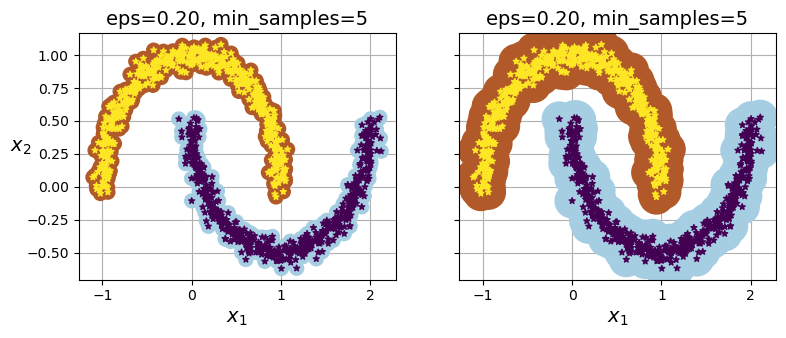

In [169]:
# Initialize another DBSCAN model, this time with eps=0.2
dbscan2 = DBSCAN(eps=0.2)
# Fit the model
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

As you can see, `dbscan`(the DBSCAN model with eps=0.05) has identified lots of anomalies (represented by the red crosses in the figure) and its clustering is disappointing.

However, with `dbscan2`(the DBSCAN model with eps=0.2), the clusters are well identified.

Thus, for the rest of this exercise, we will use dbscan2.

In [160]:
dbscan = dbscan2  # We will now use eps=0.2 because it is better, as we have observed in the previous plots.

DBSCAN does not have a `predict()` method, although it has a `fit_predict()` method.

In other words, it cannot predict the cluster of a new instance.

Simply, because the authors decided that other classification algorithms can be better at this task.

In order to cluster new instances, we will use a KNN classifier, such that we will fit on the dbscan's core samples and their labels as our training dataset, next we will use this trained KNN to predict the cluster of a new instance.

In [162]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize a KNN of 50 neighbors
knn = KNeighborsClassifier(n_neighbors=50)
# Fit the model on the dbscan's core samples (components_) and their labels
knn.fit(dbscan.components_, dbscan.labels_)

KNeighborsClassifier(n_neighbors=50)

In [163]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
# Predict on X_new using knn
knn.predict(X_new)

array([1, 0, 1, 0])

In [164]:
# Predict the probabilities of the clusters for each instance in X_new using knn
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

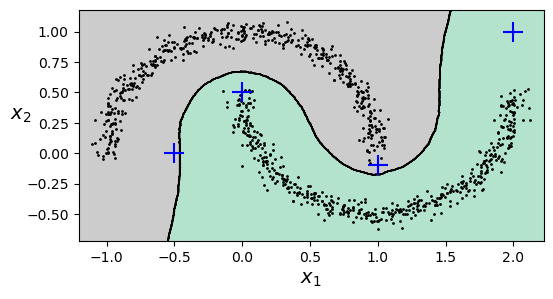

In [165]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)

plt.show()

The decision boundary represented in the previous figure shows 5 blue crosses, they are the 5 new data points I would like to cluster `X_new`.

Notice that since there is no anomaly in the training set, the classifier (KNN) always chooses a cluster, even when that cluster is far away.

It is fairely straightforward to introduce a maximum distance, in which case, the two instances that are far away from both clusters are classified as anomalies (the instance on the top right of the figure and the one on its bottom left).

To do this, look at the code below.

**NB:** It is important to highlight here that we only trained on the core instances here.<br>
However, we could have trained on all instances or on all instances excep the anomalies.<br>
This choice depends on the final task.

In [ ]:
# use the kneighbors() method of the knn model with n_neighbors=1 to grasp the nearest training instance to X_new
y_dist, y_pred_idx = ...
# y_pred_idx = indices of the train instances that are the closest to these X_new samples
# We will extract their labels
y_pred = ...
# we will replace their labels by -1 (anomaly) if the y_dist is > 0.2
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

Now, as you can see, the instance on the top right of the figure and the one on its bottom left are considered as anomalies.

# Gaussian Mixtures

Let's generate the same dataset as earliers with three ellipsoids (the one K-Means had trouble with):

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

Let's train a Gaussian mixture model on the previous dataset:

In [ ]:
from sklearn.mixture import GaussianMixture
# Initialize a GMM with 3 gaussians, n_init=10, and a random_state
gm = ...
# Fit the model to X
...

Let's look at the parameters that the Expectation Maximization (EM) algorithm estimated:

In [ ]:
# Print the weights of each cluster (the % of instances belonging to this cluster)
...

In [ ]:
# Print the means of the gaussians
...

In [ ]:
# Print the covariances of the gaussians
...

In [ ]:
# check if the algorithm  has actually converged?
converged = ...
print("The model has converged" if converged else "The model did not converge")
# if True, How many iterations did it take?
print("The nbr of iterations it took the model to converge is:", gm.n_iter_)

You can now use the model to predict which cluster each instance belongs to (hard clustering) or the probabilities that it came from each cluster. For this, just use `predict()` method or the `predict_proba()` method:

In [ ]:
# Predict on X (hard clustering)
...

In [ ]:
# predict with soft clustering now
...

This is a generative model, so you can sample new instances from it (and get their labels):

In [ ]:
# generate new instances with the sample() method of GMMs
X_new, y_new = ...
X_new

In [ ]:
y_new

Notice that they are sampled sequentially from each cluster.
You can also estimate the log of the _probability density function_ (PDF) at any location using the `score_samples()` method.

NB: these are log of the probability densities. If we would like to get the probability of an instance falling within a particular region, we need to integrate the PDF over that region. Thus, if we do this over the entire space of possibilities, the result should be 1.

In [ ]:
# compute the log of the probability density function of X
...

Now let's plot the resulting decision boundaries (dashed lines) and density contours:

In [ ]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()

You can impose constraints on the covariance matrices that the algorithm looks for by setting the `covariance_type` hyperparameter:
* `"spherical"`: all clusters must be spherical, but they can have different diameters (i.e., different variances).
* `"diag"`: clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the axes (i.e., the covariance matrices must be diagonal).
* `"tied"`: all clusters must have the same shape, which can be any ellipsoid (i.e., they all share the same covariance matrix).
* `"full"` (default): no constraint, all clusters can take on any ellipsoidal shape of any size.

In [ ]:
# Initialize and fit 3 GMM models with 3 Gaussians, n_init=10, and the same random state
# the only difference is that the first one gm_full has no constraint on the ellipsoidal clusters
# the second one, gm_tied, needs to end up with ellipsoidal clusters of the same size and orientation.
# the third one, gm_spherical, must end up with spherical clusters of any size
# the fourth one, gm_diag, results in ellipsoidal clusters with the clusters' axes parallel to the coordinate axes
gm_full = ...
gm_tied = ...
gm_spherical = ...
gm_diag = ...
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title(f'covariance_type="{gm1.covariance_type}"')

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title(f'covariance_type="{gm2.covariance_type}"')
# comparing covariance_type="tied" and covariance_type="spherical"
compare_gaussian_mixtures(gm_tied, gm_spherical, X)

plt.show()

In [ ]:
# comparing covariance_type="full" and covariance_type="diag"
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

## Anomaly Detection Using Gaussian Mixtures

Gaussian Mixtures can be used for _anomaly detection_: instances located in low-density regions can be considered anomalies. You must define what density threshold you want to use. For example, in a manufacturing company that tries to detect defective products, the ratio of defective products is usually well-known. Say it is equal to 2%, then you can set the density threshold to be the value that results in having 2% of the instances located in areas below that threshold density:

In [ ]:
# compute the PDF of X using the score_samples() method
densities = ...
# find the density_threshold, such that this thershold represents the value that results
# in having 2% of the instances located in ares of low denisty
density_threshold = np.percentile(densities, 2)
# anomalies are instances whose densities are smaller than this density_threshold
anomalies = ...

In [ ]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

## Selecting the Number of Clusters

We cannot use the inertia or the silhouette score because they both assume that the clusters are spherical. Instead, we can try to find the model that **minimizes** a theoretical information criterion such as the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC):

${BIC} = {p\log(n) - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

* $n$ is the number of instances.
* $p$ is the number of parameters learned by the model.
* $\hat L$ is the maximized value of the likelihood function of the model. This is the conditional probability of the observed data $\mathbf{X}$, given the model and its optimized parameters.

Both BIC and AIC penalize models that have more parameters to learn (e.g., more clusters), and reward models that fit the data well (i.e., models that give a high likelihood to the observed data).

**NB:** we minimize ${BIC} = {p\log(n) - 2\log({\hat L})}$ or maximize ${BIC} = 2\log({\hat L}) - {p\log(n)}$

In [ ]:
# Compute the BIC of the model gm
...

In [ ]:
# Compute the AIC of the model gm
...

We could compute the BIC manually like this:

In [ ]:
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1 # the priors
n_params_for_means = n_clusters * n_dims # the means of the Gaussians; a Gaussian = a cluster
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2 # the means of the Gaussians
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood
print(f"bic = {bic}")
print(f"aic = {aic}")
print(f"n_params = {n_params}")

There's one weight per cluster (the prior), but the sum must be equal to 1, so we have one degree of freedom less, hence the -1. Similarly, the degrees of freedom for an $n \times n$ covariance matrix is not $n^2$, but $1 + 2 + \dots + n = \dfrac{n (n+1)}{2}$;  it is equal to the number of lower triangular elements in the $n × n$ covariance matrix including all diagonal elements.

Let's train Gaussian Mixture models with various values of $k$ and measure their BIC:

In [ ]:
gms_per_k = []
bics = []
aics = []
for k in range(1,11):
  # Initialize a GMM of "k" gaussians n_init=10, and a random_state
  model = GaussianMixture(n_components=k, n_init=10, random_state=42)
  # Fit the model
  model.fit(X)
  # compute the bic
  bic = model.bic(X)
  # compute the aic
  aic = model.aic(X)
  bics.append(bic)
  aics.append(aic)

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1, 9.5, min(aics) - 50, max(aics) + 50])
plt.annotate("", xy=(3, bics[2]), xytext=(3.4, 8650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(3.5, 8660, "Minimum", horizontalalignment="center")
plt.legend()
plt.grid()

plt.show()

Looking at the evolution of $BIC$ and $AIC$ with respect to $k$, we can clearly see that they are both the lowest for $k=3$

## Bayesian Gaussian Mixture Models
Rather than manually searching for the optimal number of clusters, it is possible to use instead the `BayesianGaussianMixture` class which is capable of giving weights equal (or close) to zero to unnecessary clusters. Just set the number of components to a value that you believe is greater than the optimal number of clusters, and the algorithm will eliminate the unnecessary clusters automatically.

In [ ]:
from sklearn.mixture import BayesianGaussianMixture
# Initialize a bayesian GMM of 10 gaussians, n_init=10, and a random_state
bgm = ...
# Fit the model to X
...
# print the weights of the clusters, the Bayesian GMM model zeroes all the unnecessary clusters
...

The algorithm automatically detected that only 3 components are needed!

In [ ]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

In [ ]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)
# Initialize a bayesian GMM of 10 gaussians, n_init=10, and a random_state
bgm = ...
# Fit the model to X_moons
...

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.grid()

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

plt.show()

Oops, not great... instead of detecting 2 moon-shaped clusters, the algorithm detected 8 ellipsoidal clusters. However, the density plot does not look too bad, so it might be usable for anomaly detection.

## Cluster the Olivetti Faces Dataset

The classic Olivetti faces dataset contains 400 grayscale 64 \(×\) 64–pixel images of faces.

Each image is flattened to a 1D vector of size 4,096.

40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture.



In [ ]:
# Loading the dataset using the `sklearn.datasets.fetch_olivetti_faces()` function
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

In [ ]:
print(olivetti.DESCR)

Le us split the data into a training set, a validation set, and a test set.

The images are scales between 0 (black) and 1 (white).

Since the dataset is quite small (only 400 data points), we will use stratified sampling to ensure that there are the same number of images per person in each set.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
# Split the data to train, validation, and test sets using the stratified sampling with n_splits = 1, test size = 40, and random state
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=7)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))

X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=12)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [ ]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

To speed things up, we'll reduce the data's dimensionality using PCA:

In [ ]:
from sklearn.decomposition import PCA

# Initialize a PCA model with n_components to 0.99
pca = ...
# Fit the pca model to the train data
...
# Transform the train_data using PCA
X_train_pca = ...
# Transform the valid_data using PCA
X_valid_pca = ...
# Transform the test_data using PCA
X_test_pca = ...

print("We reduced the number of features from ", X_train.shape[1], " to ", pca.n_components_)

Let us now cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter).

In [ ]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = [] # the list of KMeans models trained each with a different value of k
for k in k_range:
    print(f"k={k}")
    # Initialize a KMeans with k clusters, n_init=10, and a random state
    kmeans = ...
    # Fit the model to the train data transformed by pca (x_train_pca)
    ...
    kmeans_per_k.append(kmeans)

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for model in kmeans_per_k:
  # compute the sihouette_score_of_model using the X_train_pca and the labels identified by the clustering model
  sihouette_score_of_model = ...
  silhouette_scores.append(sihouette_score_of_model)

# Find the index of the best model: it is the model with the highest silhouette value, hint argmax
best_index = ...
# The best k is the index corresponding to the model with the highest silhouette score, 
# i.e., it is the ith model with i = best_index
best_k = k_range[best_index]
print("The best k is :", best_k)
best_score = ...

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, "rs")
plt.grid()
plt.show()

It looks like the best number of clusters is quite high, at 100. You might have expected it to be 40, since there are 40 different people on the pictures. However, the same person may look quite different on different pictures (e.g., with or without glasses, or simply shifted left or right).

In [ ]:
# Let us compute the inertias of each KMeans model
inertias = []
for model in kmeans_per_k:
  # Compute the inertia of each model by calling the inertia_ attribute of the kmeans model
  inertia_of_model = ...
  inertias.append(inertia_of_model)
# The best inertia is the inertia of the best model, i.e., the ith model with i=best_index
best_inertia = ...

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(best_k, best_inertia, "rs")
plt.grid()
plt.show()

The optimal number of clusters is not clear on this inertia diagram, as there is no obvious elbow, so let's stick with k=120.

In [ ]:
# set the best_model variable to the model in the list kmeans_per_k having the best_k (hint: it is the best_index model)
best_model = ...

Let us Visualize the clusters.

Check if you see similar faces in each cluster?

In [ ]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

About 64 out of 100 clusters are useful: that is, they contain at least 2 pictures, all of the same person. However, the rest of the clusters have either one or more intruders, or they have just a single picture (21 with 1 image and 15 with intruders).

Clustering images this way may be too imprecise to be directly useful when training a model, but it can be tremendously useful when labeling images in a new dataset: it will usually make labelling much faster.

## Using Clustering as Preprocessing for Classification

 Let us continue with the Olivetti faces dataset.

 However, here, the goal is to predict which person is represented in a picture.

 In other words, the goal is a classification, not a clustering.

 Thus, the first step is to train a classifier (Random Forest) to predict which person is represented in each picture, and evaluate it on the validation set.

 Next, we will use KMeans as a dimensionality reduction tool and train the classifier on the reduced dataset.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize a random forest classifier of 150 trees and a random state
clf = ...
# Fit the model to the train data transformed by PCA
...
# Predict on the validation data (X_valid_pca) and compute the validation accuracy using the score method
validation_score = ...
print("validation score: ",validation_score)

In [ ]:
# Use the best_model from previous exercise to transform the X_train_pca, X_valid_pca, and X_test_pca.
# This time we are not using the best_model Kmeans to predict the cluster, 
# we are using it for dimensonality reduction (transform)
X_train_reduced = ...
X_valid_reduced = ...
X_test_reduced = ...

# Initialize a random forest classifier of 150 trees and a random state
clf = ...
# Fit the model to the train data transformed by Kmeans (X_train_reduced)
...
# Predict on the validation data (X_valid_reduced) and compute the validation accuracy using the score method
...

**The accuracy is worst now!!!**

To fix this, we will need to tune the number of clusters.

We will search for the number of clusters that allows the classifier to get the best performance.

We could use a `GridSearchCV`, but since we already have a validation set, we don't need K-fold cross-validation, and we're only exploring a single hyperparameter, so it's simpler to just run a loop manually:

In [ ]:
from sklearn.pipeline import make_pipeline

for k in k_range:
    # Initialize a pipeline with: (1) a Kmeans model of "k" clusters, n_init=10, and a random state and (2) a random forest model of 150 trees and a random state
    pipeline = ...
    # Fit the pipeline to the X_train_pca, y_train data
    ...
    # Predict on the validation data (X_valid_pca) and compute the validation accuracy using the score method
    score_pipeline = ...
    print("with k=",k," the validation accuracy is:", score_pipeline)

It seems that even by tuning the number of clusters, we never get beyond 80% accuracy.

Looks like the distances to the cluster centroids are not as informative as the original images.

What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?

by appending features, we mean fuse both features the one coming from pca and the one coming from kmeans i.e., the number of features is now 200 + the value of the best_k; suppose best_k=100 --> total nbr of features is 200+100=300 --> x1, x2, x3, ..., x300.

In [ ]:
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]
print("The new number of features is:", X_train_extended.shape[1])
# Initialize a random forest with 150 trees and a random_state
clf = ...
# Fit the model to the new extended dataset
...
# Compute the validation accuracy of the X_valid_extended using the score method ()
...

As we can see the accuracy is always in the 80% --> still worse than without the cluster features.

In conclusion, in this case, the clusters are not useful to directly train a classifier.

However, they can still be useful when labelling new training instances.

## A Gaussian Mixture Model for the Olivetti Faces Dataset

Let us now use a Gaussian mixture model on the Olivetti faces dataset.

To speed up the algorithm, we will reduce the dataset's dimensionality (e.g., use PCA, preserving 99% of the variance).

In [ ]:
from sklearn.mixture import GaussianMixture
# Initialize a GMM of 40 gaussians and a random_state
gm = ...
# Fit the model to X_train_pca
...
# Predict on the train data
y_pred = ...

Since GMM is a generative model, we could use it to generate some new faces (using the `sample()` method), and visualize them.

NB: Since we have used PCA, we will need to use its `inverse_transform()` method to recover the 4096 components (i.e. 64 × 64).

In [ ]:
# generate 20 faces using the sample() method of the GMM model
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = ...
# Transform the gen_faces_reduced back to their original data size using the inverse_transform() function
gen_faces = pca.inverse_transform(gen_faces_reduced)

In [ ]:
plot_faces(gen_faces, y_gen_faces)

Now, let us test our model if it can detect anomalies.

For that, we will modify some images (e.g., rotate, flip, darken).

Next, we will compute the log of the probability density function using the `score_samples()` method and see if the model can detect the anomalies (i.e., compare the output of the `score_samples()` method for normal images and for anomalies).

In [ ]:
X_train[0]*0.8

In [ ]:
# we will rotate the first 4 training samples
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

# we will flip the first 3 training samples
n_flipped = 4
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]# ::-1 == reverse, example a="1234", a[::-1] = "4321"
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

# we will darken the first 3 training samples, to darken the image, I am multipliying the pixel values by 0.3 --> values will be closer to 0.0 than 1.0 --> darker
n_darkened = 4
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [ ]:
# Transform the bad faces using PCA (reduce their dimensioanlity)
X_bad_faces_pca = ...
# Compute the log of the probability density function of the X_bad_faces_pca using the `score_samples()` method
log_proba_density_of_bad_faces = ...
# Since we only altered the first 4 faces, we will compute the log of the probability density function of the first 4 data points of the X_train_pca
log_proba_density_of_good_faces = ...

In [ ]:
log_proba_density_of_bad_faces = log_proba_density_of_bad_faces.round(1)
log_proba_density_of_good_faces = log_proba_density_of_good_faces.round(1)
print("the score sample of the first 4 bad rotated faces are:", log_proba_density_of_bad_faces[0:4], "\nwhile the scores of the normal faces are:", log_proba_density_of_good_faces)
print("\nthe score sample of the first 4 bad flipped faces are:", log_proba_density_of_bad_faces[4:8], "\nwhile the scores of the normal faces are:", log_proba_density_of_good_faces)
print("\nthe score sample of the first 4 bad darkened faces are:", log_proba_density_of_bad_faces[8:], "\nwhile the scores of the normal faces are:", log_proba_density_of_good_faces)

The bad faces are all considered highly unlikely by the Gaussian Mixture model contradictory to the scores of the normal samples.

## Using Dimensionality Reduction Techniques for Anomaly Detection
Some dimensionality reduction techniques can also be used for anomaly detection.

For example, in the previous exercise, we have used the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance.

Then compute the reconstruction error for each image.

The reconstruction error is a metric widely used in computer vision. It is the sum of the squared distance between each pixel in the original image and the pixel in the generated image; such that the generated image = image outputted by a Machine or Deep Leraning model. If the pixels are different in terms of values --> the distances will be >> --> the reconstruction error >> --> the generated images are not similar to the real images --> the model has failed to reconstruct the data!

PCA compresses the data, thus, when we apply the inverse we will decompress them, however, this does not mean that they will be exactly similar to the original ones. However, they will still be similar to a great extent --> the reconstruction error will be so <<<.

Nevertheless, if we compute the reconstruction error on the modified images we have created  in the previous exercise, we will notice how much larger the reconstruction error is.

And most importantly, if we plot a reconstructed image, we will see why: PCA tries to reconstruct a normal face because it has learned only the normality.

In [ ]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [ ]:
reconstruction_errors(pca, X_train).mean()

In [ ]:
reconstruction_errors(pca, X_bad_faces).mean()

In [ ]:
plot_faces(X_bad_faces, y_bad)

In [ ]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad)